In [1]:
import gc
import glob
import os
import time

import coco
import viz
import cv2

import numpy as np
import pandas as pd
import tensorflow as tf
import config

import matplotlib.pyplot as plt
from giss_data import GISSDetection, mAPevaluate
from common import CustomResize, clip_boxes


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
dicts_annots = GISSDetection().load_annotations(config.TRAIN_LABELS)

In [5]:
cv2.imread(dicts_annots[0]['file_name'][0]).shape

(3456, 4608, 3)

In [6]:
ratio = 3456 / 4608

In [8]:
1024 * ratio

768.0

In [6]:
def preprocess(img):
    fname, dfname, boxes, klass, is_crowd = \
        img['file_name'][0], img['file_name'][1], \
        img['boxes'], img['class'], img['is_crowd']
    boxes = np.copy(boxes)

    im = cv2.imread(fname, cv2.IMREAD_COLOR)
    im_depth = cv2.imread(dfname, 0)
    if im_depth.shape[:2] != im.shape[:2]:
        im_depth = cv2.resize(im_depth, im.shape[:2][::-1])
    im_depth = np.expand_dims(im_depth, axis=-1)
    im = np.concatenate([im, im_depth], axis=-1)
    return im

In [7]:
imgs_all = []

for i in dicts_annots:
    imgs_all.append(preprocess(i))

In [12]:
for img in imgs_all:
    print(img.shape)

(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3456, 4608, 4)
(3648, 4864, 4)
(3648, 4864, 4)
(3648, 4864, 4)
(3648, 4864, 4)
(3648, 4

In [8]:
len(imgs_all)

102

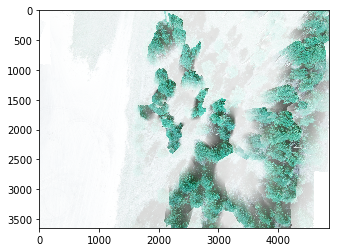

In [11]:
plt.imshow(imgs_all[98])

## 4-Channel model

### Change weights:
- https://github.com/tensorpack/tensorpack/blob/master/scripts/dump-model-params.py